# Data Aggregation 
Problem Statement: Analyzing Sales Performance by Region in a Retail Company 
Dataset: "Retail_Sales_Data.csv" 
Description: The dataset contains information about sales transactions in a retail company. It 
includes attributes such as transaction date, product category, quantity sold, and sales 
amount. The goal is to perform data aggregation to analyze the sales performance by region 
and identify the top-performing regions. 
Tasks to Perform: 
1. Import the "Retail_Sales_Data.csv" dataset. 
2. Explore the dataset to understand its structure and content. 
3. Identify the relevant variables for aggregating sales data, such as region, sales 
amount, and product category. 
4. Group the sales data by region and calculate the total sales amount for each region. 
5. Create bar plots or pie charts to visualize the sales distribution by region. 
6. Identify the top-performing regions based on the highest sales amount. 
7. Group the sales data by region and product category to calculate the total sales 
amount for each combination. 
8. Create stacked bar plots or grouped bar plots to compare the sales amounts across 
different regions and product categories. 

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- Task 1: Import the dataset

In [25]:
df = pd.read_csv('Retail_Sales_Data.csv')

- Task 2: Explore the dataset to understand its structure and content

In [26]:
print(df.head())
print(df.info())
print(df.describe())

     Store ID  Product ID        Date  Units Sold  Sales Revenue (USD)  \
0  Spearsland    52372247  2022-01-01           9              2741.69   
1  Spearsland    52372247  2022-01-02           7              2665.53   
2  Spearsland    52372247  2022-01-03           1               380.79   
3  Spearsland    52372247  2022-01-04           4              1523.16   
4  Spearsland    52372247  2022-01-05           2               761.58   

   Discount Percentage  Marketing Spend (USD)             Store Location  \
0                   20                     81                   Tanzania   
1                    0                      0                 Mauritania   
2                    0                      0  Saint Pierre and Miquelon   
3                    0                      0                  Australia   
4                    0                      0                  Swaziland   

  Product Category Day of the Week  Holiday Effect  
0        Furniture        Saturday           

In [27]:
print(df.columns)

Index(['Store ID', 'Product ID', 'Date', 'Units Sold', 'Sales Revenue (USD)',
       'Discount Percentage', 'Marketing Spend (USD)', 'Store Location',
       'Product Category', 'Day of the Week', 'Holiday Effect'],
      dtype='object')


- Task 4: Group the sales data by store location and calculate the total sales amount for each region

In [28]:
sales_by_region = df.groupby('Store Location')['Sales Revenue (USD)'].sum().reset_index()

- Task 5: Create bar plots to visualize the sales distribution by region

C:\Users\Aditi\AppData\Local\Temp\ipykernel_18264\3411603106.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales Revenue (USD)', y='Store Location', data=sales_by_region, palette='viridis', legend=False)


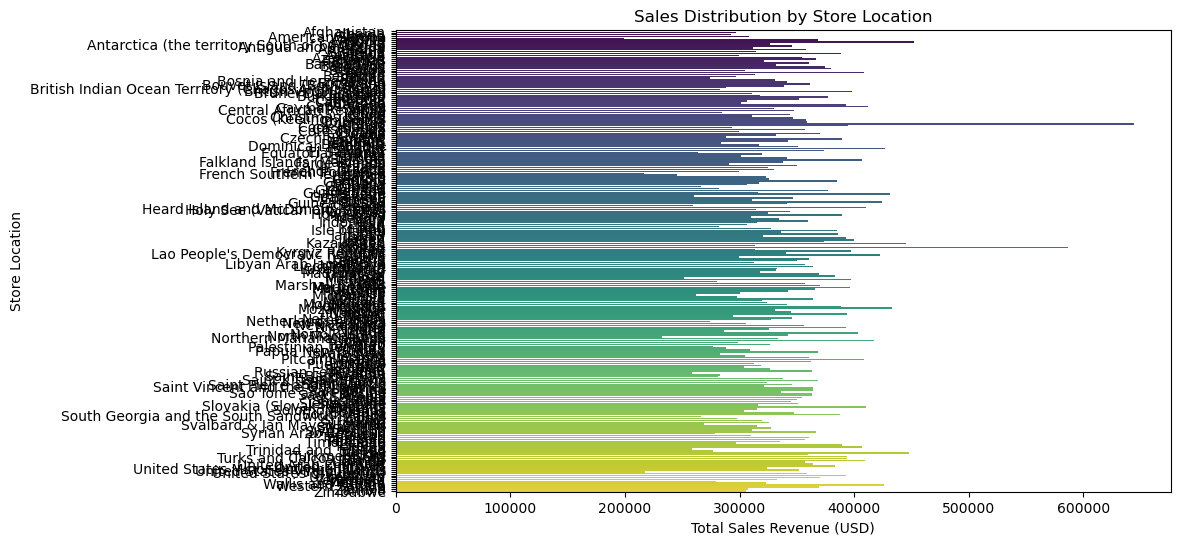

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales Revenue (USD)', y='Store Location', data=sales_by_region, palette='viridis', legend=False)
plt.title('Sales Distribution by Store Location')
plt.xlabel('Total Sales Revenue (USD)')
plt.ylabel('Store Location')
plt.show()

- Task 6: Identify the top-performing regions based on the highest sales amount

In [30]:
top_regions = sales_by_region.sort_values(by='Sales Revenue (USD)', ascending=False).head(5)
print("Top Performing Regions:")
print(top_regions)

Top Performing Regions:
    Store Location  Sales Revenue (USD)
49           Congo            644103.38
114          Korea            586331.83
6         Anguilla            452484.21
222         Turkey            447835.20
112          Kenya            445464.81


- Task 7: Group the sales data by store location and product category to calculate total sales amount

In [31]:
sales_by_region_category = df.groupby(['Store Location', 'Product Category'])['Sales Revenue (USD)'].sum().unstack().fillna(0)

- Task 8: Create stacked bar plots to compare sales amounts across different regions and product categories

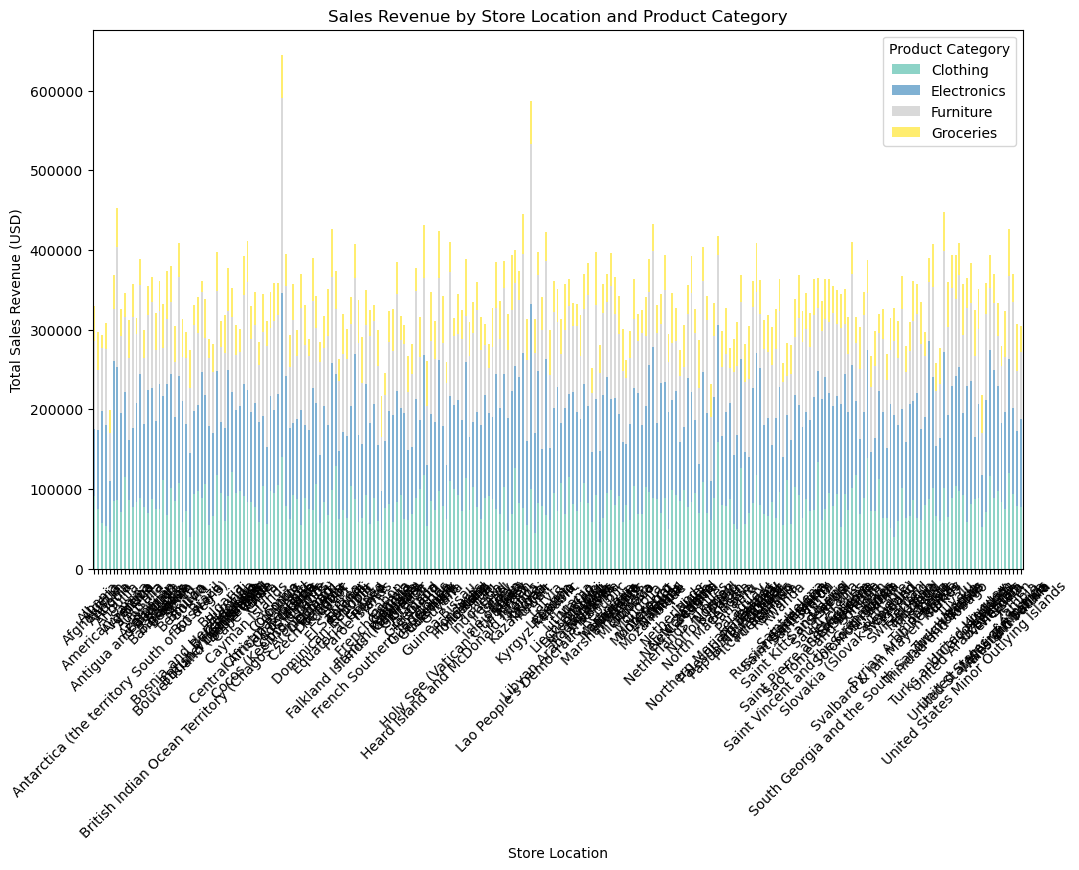

In [32]:
sales_by_region_category.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='Set3')
plt.title('Sales Revenue by Store Location and Product Category')
plt.xlabel('Store Location')
plt.ylabel('Total Sales Revenue (USD)')
plt.legend(title='Product Category')
plt.xticks(rotation=45)
plt.show()